# 01 Visualize

Goal of this notebook:

Read the branches of the ROOT file with uproot, and visualize the variables.

In [1]:
# Use uproot/awkward-array to process a ROOT file
import uproot
import awkward as ak
import numpy as np

# Use boost_histogram to make a histogram
import boost_histogram as bh

import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
# make ROOT-style plots using python package matplotlib
plt.style.use(hep.style.ROOT)

Read the branches of the ROOT file

In [2]:
import os
# Determine the base directory and the remote git path
hostname = os.uname()[1]
if 'pku.edu.cn' in hostname: # on PKU cluster
    basedir = '/data/pubfs/pku_visitor/public_write/ML/dihiggs_ntuples/'
elif 'thu' in hostname: # on THU cluster
    basedir = '/data/pubfs/pku_visitor/public_write/ML/dihiggs_ntuples/'
elif hostname.startswith('lxslc'): # on IHEP lxslc
    basedir = '/scratchfs/cms/licq/cmschina/ML/dihiggs_ntuples/'
elif hostname.startswith('lxplus'): # on CERN lxplus
    basedir = '/eos/user/c/coli/cmschina/ML/dihiggs_ntuples/'
else:
    raise RuntimeError('Machine not supported')

events_sig = uproot.lazy(basedir + "hh2b2w.root")
events_bkg = uproot.lazy(basedir + "ttbar.root")
print(ak.fields(events_sig))

['event', 'is_sig', 'is_bkg', 'bjet1_pt', 'bjet1_eta', 'bjet1_phi', 'bjet1_eratio', 'bjet1_mass', 'bjet1_ncharged', 'bjet1_nneutrals', 'bjet2_pt', 'bjet2_eta', 'bjet2_phi', 'bjet2_eratio', 'bjet2_mass', 'bjet2_ncharged', 'bjet2_nneutrals', 'lep1_pt', 'lep1_phi', 'lep1_eta', 'lep1_charge', 'lep1_type', 'lep2_pt', 'lep2_phi', 'lep2_eta', 'lep2_charge', 'lep2_type', 'met', 'met_phi']


Make distributions

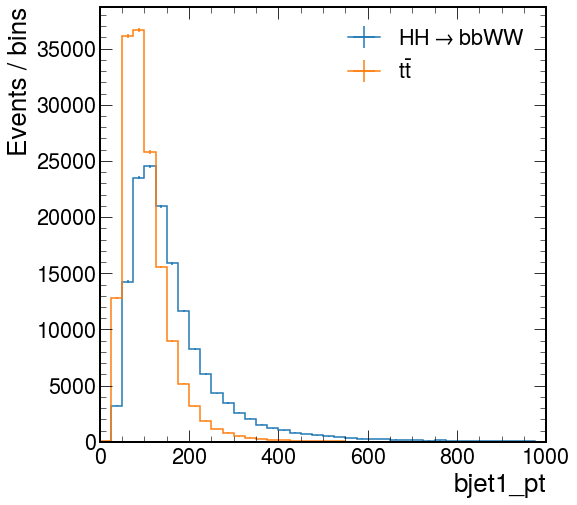

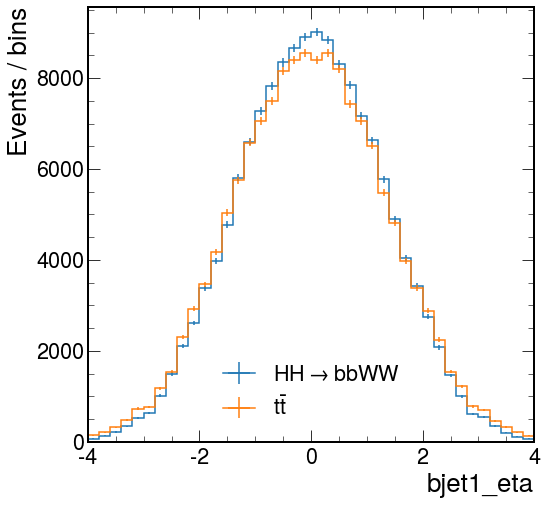

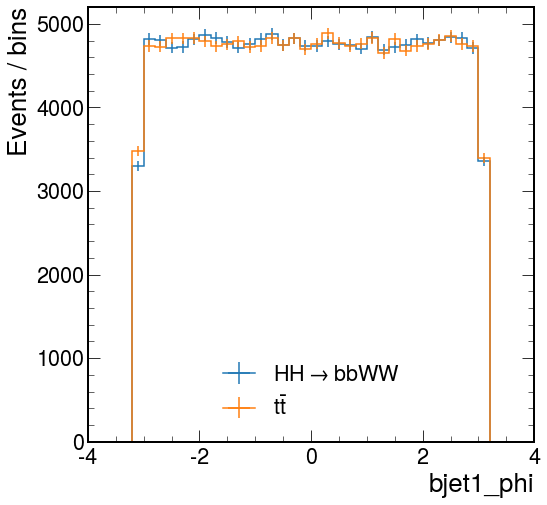

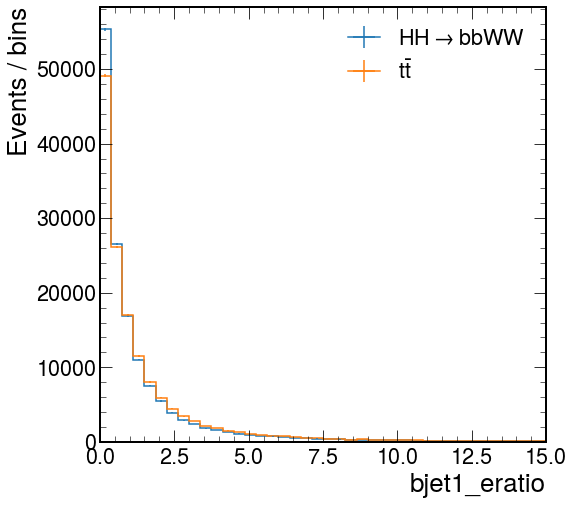

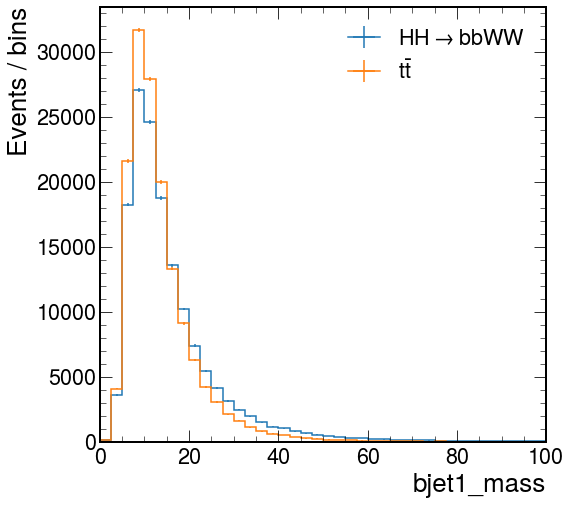

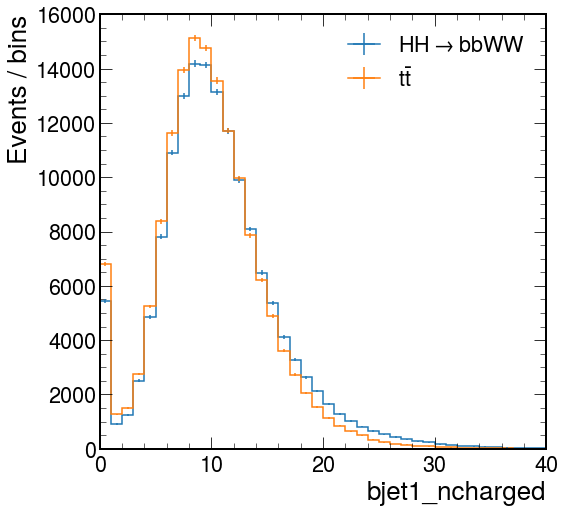

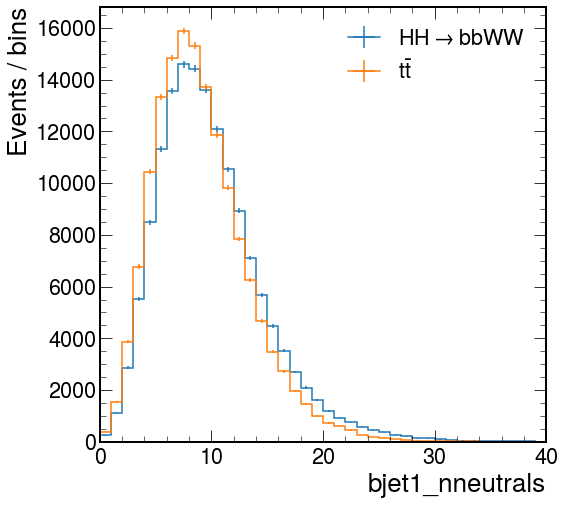

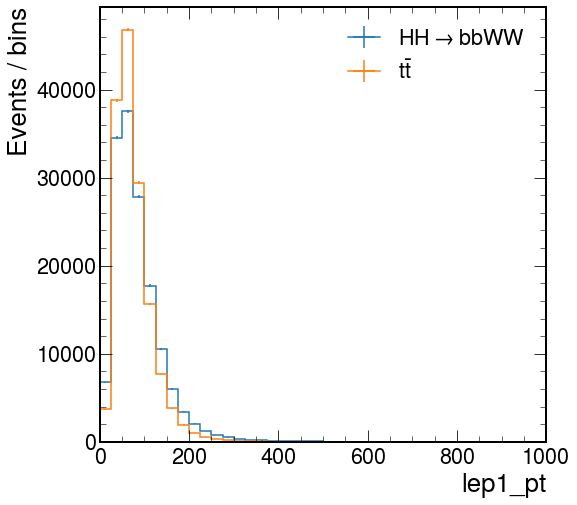

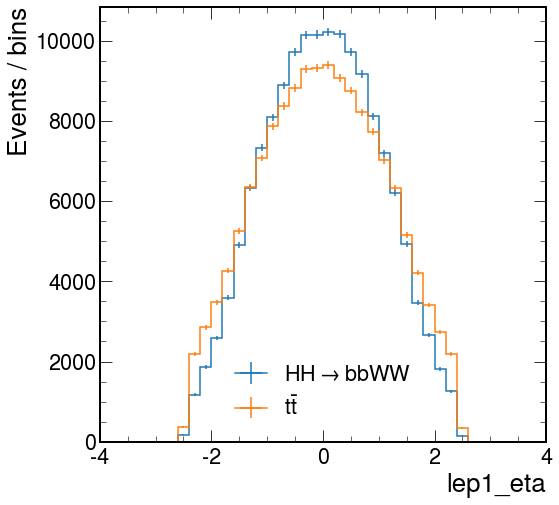

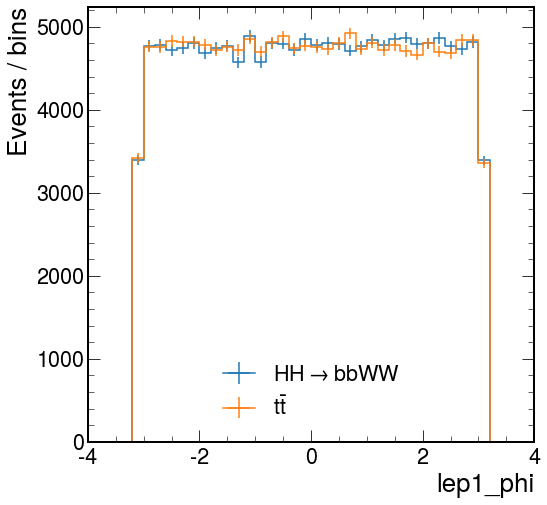

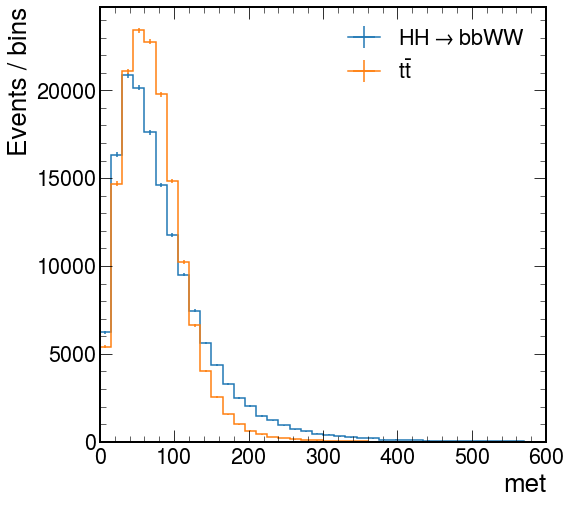

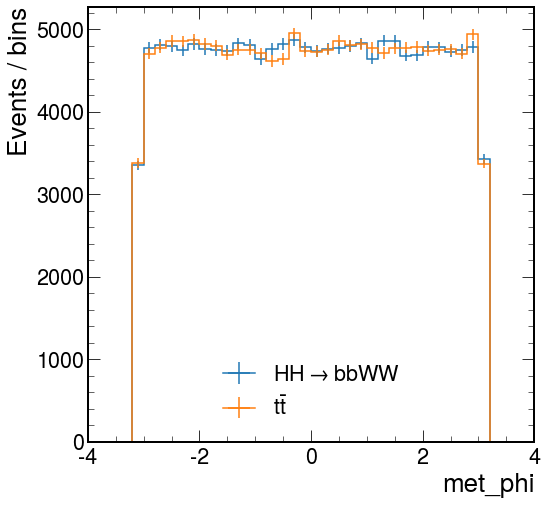

In [3]:
plotinfo = [ # varname, nbin, xmin, xmax
    ('bjet1_pt', 40, 0, 1000),
    ('bjet1_eta', 40, -4, 4),
    ('bjet1_phi', 40, -4, 4),
    ('bjet1_eratio', 40, 0, 15),
    ('bjet1_mass', 40, 0, 100),
    ('bjet1_ncharged', 40, 0, 40),
    ('bjet1_nneutrals', 40, 0, 40),
    ('lep1_pt', 40, 0, 1000),
    ('lep1_eta', 40, -4, 4),
    ('lep1_phi', 40, -4, 4),
    ('met', 40, 0, 600),
    ('met_phi', 40, -4, 4),
]
for v, nbin, xmin, xmax in plotinfo:
    f, ax = plt.subplots(figsize=(8, 8))
    for evts, lab in zip([events_sig, events_bkg], [r'$HH \rightarrow bbWW$', r'$t\bar{t}$']):
        # fill the histogram
        hist = bh.Histogram(bh.axis.Regular(nbin, xmin, xmax), storage=bh.storage.Weight())
        hist.fill(evts[v])
        content, yerr = hist.view().value, np.sqrt(hist.view().variance)
        # plot the histogram
        hep.histplot(content, bins=hist.axes[0].edges, yerr=yerr, label=lab)
    ax.set_xlabel(v, ha='right', x=1.0)
    ax.set_ylabel('Events / bins', ha='right', y=1.0)
    ax.set_xlim(xmin, xmax)
    ax.legend()